In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('powerplant (3).csv')
df.head()

,T,AP,RH,V,EP
0,8.34,1010.84,90.01,40.77,480.48
1,23.64,1011.40,74.20,58.49,445.75
2,29.74,1007.15,41.91,56.90,438.76
3,19.07,1007.22,76.79,49.69,453.09
4,11.80,1017.13,97.20,40.66,464.43


In [3]:
df.shape

(9568, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       9568 non-null   float64
 1   AP      9568 non-null   float64
 2   RH      9568 non-null   float64
 3   V       9568 non-null   float64
 4   EP      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
X = df.drop(columns=['EP'])
y = df['EP']
X.head()

,T,AP,RH,V
0,8.34,1010.84,90.01,40.77
1,23.64,1011.40,74.20,58.49
2,29.74,1007.15,41.91,56.90
3,19.07,1007.22,76.79,49.69
4,11.80,1017.13,97.20,40.66


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(7654, 4)

In [9]:
X_test.shape

(1914, 4)

## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [11]:
sc = MinMaxScaler()

In [12]:
sc2 = StandardScaler()

In [13]:
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[0.66373938, 0.4555803 , 0.54497922, 0.69518424],
       [0.6878187 , 0.359317  , 0.80185011, 0.82159796],
       [0.70311615, 0.55085375, 0.79863252, 0.88143013],
       ...,
       [0.45864023, 0.55704034, 0.47888457, 0.33454943],
       [0.70594901, 0.44196981, 0.55329133, 0.79314119],
       [0.13002833, 0.78470676, 0.82142378, 0.25209777]])

In [14]:
sc2.fit(X_train)

X_train = sc2.transform(X_train)
X_test = sc2.transform(X_test)
X_train

array([[ 0.74805289, -0.32660017, -0.49711722,  0.72006931],
       [ 0.86181948, -0.98521113,  0.8181501 ,  1.26515721],
       [ 0.93409473,  0.32523844,  0.80167494,  1.52314975],
       ...,
       [-0.22097078,  0.36756563, -0.83554456, -0.834965  ],
       [ 0.94747903, -0.41971997, -0.45455637,  1.14245344],
       [-1.77355014,  1.92520594,  0.91837402, -1.19049131]])

In [15]:
X_test

array([[ 1.34499288, -1.28658067, -1.10532538,  0.23869298],
       [ 0.81095912, -0.74140656,  0.26485915,  1.36269098],
       [-0.2437241 ,  1.99970178, -0.19713193, -0.73900436],
       ...,
       [-0.67068342, -0.29951077, -0.10651852, -1.15902881],
       [ 1.31420898, -0.87346737, -0.44288647,  1.33752097],
       [-0.2611237 ,  0.37433797,  1.10646548, -0.27021304]])

In [16]:
X_train.shape

(7654, 4)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [18]:
model = Sequential()

In [19]:
model.add(layers.Input(shape=(4,))) 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

In [20]:
model.compile(optimizer='adam',
              loss = 'mse',
              metrics=['mae']
             )

In [21]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 176371.7969 - mae: 417.4516  
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35210.8398 - mae: 161.3332  
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 9580.9463 - mae: 81.9078 
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 3519.8748 - mae: 48.9148
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 1364.7046 - mae: 29.8785
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 678.3826 - mae: 20.5074
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 393.5129 - mae: 15.3132
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 245.9349 - mae: 11.9195
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 163.4985 - mae: 9.6305 
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 114.0243 - mae: 7.9805
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 82.9876 - mae: 6.7573
Epoch 12/100
240/240 ━━━━━━━━━━

Text(0, 0.5, 'Loss')

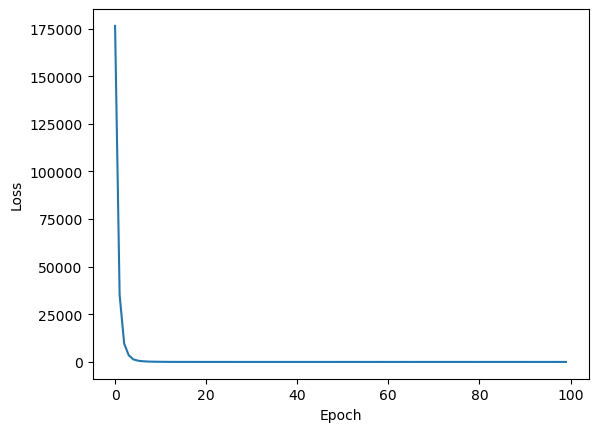

In [22]:
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [23]:
loss , mae = model.evaluate(X_test,y_test)
print(loss)
print(mae)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 17.6809 - mae: 3.2252
17.680875778198242
3.225182294845581


In [24]:
y_pred = model.predict(X_test)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


array([[435.1225 ],
       [435.59167],
       [460.5155 ],
       ...,
       [469.09705],
       [432.16895],
       [456.8059 ]], dtype=float32)

In [25]:
from sklearn.metrics import r2_score

In [26]:
y_test

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
         ...  
7204    456.70
1599    438.04
5697    467.80
350     437.14
6210    456.78
Name: EP, Length: 1914, dtype: float64

In [27]:
y_pred = y_pred.flatten()

In [28]:
y_pred.astype(pd.Series)

array([435.12249755859375, 435.5916748046875, 460.5155029296875, ...,
       469.0970458984375, 432.1689453125, 456.805908203125], dtype=object)

In [29]:
r2 = r2_score(y_test, y_pred.astype(pd.Series))

In [30]:
r2

0.9382099083821132

In [31]:
y_pred

array([435.1225 , 435.59167, 460.5155 , ..., 469.09705, 432.16895,
       456.8059 ], dtype=float32)

In [32]:
y_test

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
         ...  
7204    456.70
1599    438.04
5697    467.80
350     437.14
6210    456.78
Name: EP, Length: 1914, dtype: float64

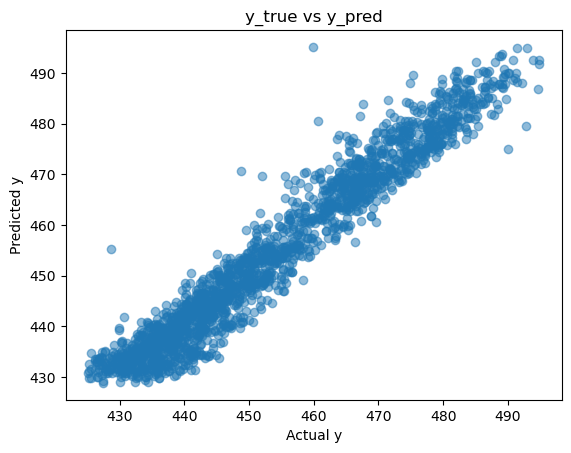

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("y_true vs y_pred")
plt.show()


In [34]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

comparison.head(20)

,Actual,Predicted
0,433.27,435.122498
1,438.16,435.591675
2,458.42,460.515503
3,480.82,478.626587
4,441.41,437.382751
5,454.75,459.727112
6,483.26,484.395081
7,478.25,482.129944
8,434.16,440.819092
9,470.66,469.682556


In [35]:
y_mean_pred = np.full_like(y_test, y_test.mean())
print("Baseline R2:", r2_score(y_test, y_mean_pred))
print("Model R2:", r2_score(y_test, y_pred))


Baseline R2: 0.0
Model R2: 0.9382099083821132
